# From Data to Careers: A Subreddit Journey through r/datascience and r/jobs


---

## Part 1: Data Wrangling/Gathering/Acquisition


---

#### Introduction

In this section, I will craft a data collection script to retrieve posts from r/datascience and r/jobs, storing information in a structured format. Detailed explanation of the scripts will be highlighted in order to guarantee a continuous flow of relevant data. Emphasis will be placed on user input, API credential storage, and advanced functionality for data cleanup and maintenance.

---

#### Deliverables

- Detailed explanation of the data gathering script
- Ensure effective handling of missing values and outliers
- User input for subreddit selection and API credentials
- Script for data collection and transaction log creation
- Bonus explanation and implementation details with relevant summary statistics


---

#### Imports

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import requests
import time

# way to obscure inputs, so my info is not pushed to bh repo
import getpass

#for transaction log
import datetime
import json

---

#### Data Gathering and Authorizing

needs to be removed

- client_id = T4fRXhQZ923qoWbOF1mRrQ
- client_secret = NLHXPH6erxSKPne9F84frdSXgebOGA
- user_agent = dsi1113/datascience_jobs
- username = New_Camp1627
- password = *

In [45]:
#function to collect data from Reddit API
def collect_data(subreddit, num_posts=3000):
    
    """
    Collects post data from a specified subreddit 
    using Reddit API.
    
    Parameters: 
    - subreddit (str): The name of the subreddit to 
    collect data from
    - num_posts (int): The desired number of post to 
    collect. Default to 3000
    
    Returns:
    - list: a list containing post data as dictionaries, 
    where each dictionary represent info on reddit post
    
    Note:
    The data is collected in batches until the desired
    number of post is reached. The Authentication detail 
    provide access to the developed application found in reddit.
    The transaction log keeps track of the total number of 
    post retrieved.
    
    Example usage: 
    subreddit_data = collect_data('datascience', num_posts=3000)
    
    """
    
    base_url = 'https://oauth.reddit.com/r/'
    headers = {'User-Agent': 'dsi1113/datascience_jobs'}
    
    #Authentication details
    #alphanumeric string provided under "personal use script"
    client_id =  getpass.getpass()
    #alphanumeric string provided as "secret"
    client_secret = getpass.getpass()
    # name of my application
    user_agent = getpass.getpass()
    #reddit username
    username = getpass.getpass()
    #reddit password
    password = getpass.getpass()
    
    #retrieve access token, authentication framework
    auth = requests.auth.HTTPBasicAuth(client_id, client_secret)
    
    #data collection script
    data = {
    #the type of authorization being requested when exchanging the user's credentials
    'grant_type': 'password',
    'username': username,
    'password': password
    }
    
    # Loop to collect data until reaching the desired number of posts
    posts_data = []
    after = None
    cumulative_posts_retrieved = 0
    
    while len(posts_data) < num_posts:
        params = {'limit': min(100, num_posts - len(posts_data)), 'after': after} if after else {'limit': min(100, num_posts - len(posts_data))}
        res = requests.get(f'{base_url}{subreddit}/new.json', headers=headers, params=params, auth=auth)
        
        if res.status_code == 200:
            response_data = res.json()
            posts_data.extend(response_data['data']['children'])
            after = response_data['data']['after']  # 'after' parameter for paginating through posts
            cumulative_posts_retrieved += len(response_data['data']['children'])
        else:
            print(f"Error: {res.status_code}")
            break
            
    #log transaction detail
    transaction_log = {
        'execution_datetime': str(datetime.datetime.now()),
        'posts_retrieved': len(posts_data),
        'total_posts_retrieved_to_date': cumulative_posts_retrieved + len(posts_data)
    }
    #writing to json file
    with open('transaction_log.json', 'a') as log_file:
        log_file.write(json.dumps(transaction_log) + '\n')
            
    return posts_data
    

---

**r/datascience dataframe**

In [46]:
#collects data from the 'datascience' subreddit using the
#collect_data function
subreddit_data = collect_data('datascience', num_posts=3000)

 ········
 ········
 ········
 ········
 ········


In [47]:
##Create a dataframe df_datascience from the collected data
df_datascience = pd.DataFrame([post['data'] for post in subreddit_data])

In [48]:
df_datascience.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,is_video,media_metadata,post_hint,preview,author_cakeday,url_overridden_by_dest,crosspost_parent_list,crosspost_parent,is_gallery,gallery_data
0,None,datascience,Hi I wanted to get some takes from actual sta...,t2_4ffvev5v,False,None,0,False,Interested in statistics not sure how to proceed,[],...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,datascience,I'm a statistician looking for work after a la...,t2_6cjiszgb,False,None,0,False,Create Github repository?,[],...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,datascience,My upcoming course is focused on programming a...,t2_3puwn,False,None,0,False,Linear Algebra and Multivariate Calculus,[],...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,datascience,Our company has 1000 ish headcount with 3 dist...,t2_16kgog,False,None,0,False,"DS org, decentralized or centralized?",[],...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,datascience,"Hi all, I'd like to rehash my understanding of...",t2_xfx8ms4,False,None,0,False,Probability reference book for data science pr...,[],...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,None,datascience,\n\nWelcome to this week's entering &amp; tra...,t2_6l4z3,False,None,0,False,Weekly Entering &amp; Transitioning - Thread 2...,[],...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,None,datascience,Does anyone have a good resource or example pr...,t2_44oxrfns,False,None,0,False,PyTorch LSTM for time series,[],...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,None,datascience,I see LLM's are all the rage these days. Learn...,t2_a0h39pj0,False,None,0,False,What Domain of DS will have most jobs in the f...,[],...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,None,datascience,"Hey folks, I am learning Time series Forecasti...",t2_agvtvokn,False,None,0,False,Walk forward validation,[],...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,None,datascience,How do you land a data job when you’re a physi...,t2_u58v9e5m,False,None,0,False,Job hunt status: feeling defeated,[],...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_datascience.shape

(3000, 116)

---

**r/jobs dataframe**

In [50]:
#collects data from the 'jobs' subreddit using the
#collect_data function
subreddit_data2 = collect_data('jobs', num_posts=3000)

 ········
 ········
 ········
 ········
 ········


In [52]:
#Create a dataframe df_jobs from the collected data
df_jobs = pd.DataFrame([post['data'] for post in subreddit_data2])

In [53]:
df_jobs.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,is_video,post_hint,preview,url_overridden_by_dest,media_metadata,author_cakeday,is_gallery,gallery_data,crosspost_parent_list,crosspost_parent
0,None,jobs,Read that the best way to land a job nowadays ...,t2_3w2gl0jlt,False,None,0,False,How do people with Anxiety and terrible social...,"[{'e': 'text', 't': 'Networking'}]",...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,jobs,"""Mass layoffs are in store for 2024, and it mi...",t2_105cy9,False,None,0,False,Massive layoffs coming in 2024?,"[{'e': 'text', 't': 'Article'}]",...,False,self,{'images': [{'source': {'url': 'https://extern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,jobs,I enjoy solving problems &amp; dealing with co...,t2_oqajavlw,False,None,0,False,What are some scientific jobs that are innovat...,"[{'e': 'text', 't': 'Job searching'}]",...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,jobs,Process at my company is quite easy and my man...,t2_pbff0s9v,False,None,0,False,How's your annual performance review?,"[{'e': 'text', 't': 'Evaluations'}]",...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,jobs,Interviewed with a company and was offered the...,t2_6m4lv,False,None,0,False,Part time job on resume?,"[{'e': 'text', 't': 'Post-interview'}]",...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df_jobs.shape

(3000, 116)

---

### Data Cleaning and EDA

Columns dictionary:
- selftext: is the body of the post, containing the main content
- title: The title of the post
- gilded: The number of awards the post has received
- author_fullname: The unique identifier of the author of the post
- subreddit: The name of the subreddit
- upvote_ratio: The ratio of upvotes to total votes for a post.
- score: The overall score of a post, calculated as upvotes minus downvotes.
- num_comments: The number of comments a post has received. 

Deliverables:
- handle missing values and outliers
    - drop colums if all values are missing
    - Remove duplicated post
    - Remove post where word count is 0
- examine data distribution
    - explore the distribution of text length
    - plot histogram or bloxplot
    - analyze word frequencies
    - examine common words and term
    - compute summary statistic for self text
- create new columns for word count and length based on selftext

**r/datascience**

In [57]:
df_datascience.isnull().sum()

approved_at_utc           3000
subreddit                    0
selftext                     0
author_fullname             54
saved                        0
                          ... 
url_overridden_by_dest    2849
crosspost_parent_list     2971
crosspost_parent          2971
is_gallery                2996
gallery_data              2996
Length: 116, dtype: int64

In [ ]:
#drop columns where 50% of the values are missing
# threshold = 0.5 * len(df_datascience)
# df_datascience.dropna(axis=1, thresh=threshold, inplace=True)

In [70]:
#Drop columns if all the value are missing
df_datascience.dropna(axis=1, how='all', inplace=True)

,subreddit,selftext,author_fullname,saved,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,...,is_video,media_metadata,post_hint,preview,author_cakeday,url_overridden_by_dest,crosspost_parent_list,crosspost_parent,is_gallery,gallery_data
0,datascience,Hi I wanted to get some takes from actual sta...,t2_4ffvev5v,False,0,False,Interested in statistics not sure how to proceed,[],r/datascience,False,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,datascience,I'm a statistician looking for work after a la...,t2_6cjiszgb,False,0,False,Create Github repository?,[],r/datascience,False,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,datascience,My upcoming course is focused on programming a...,t2_3puwn,False,0,False,Linear Algebra and Multivariate Calculus,[],r/datascience,False,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,datascience,Our company has 1000 ish headcount with 3 dist...,t2_16kgog,False,0,False,"DS org, decentralized or centralized?",[],r/datascience,False,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,datascience,"Hi all, I'd like to rehash my understanding of...",t2_xfx8ms4,False,0,False,Probability reference book for data science pr...,[],r/datascience,False,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,datascience,During my BSc biochemistry degree I realised t...,t2_5ojsq5gx,False,0,False,Finding ds job after life sciences degree,[],r/datascience,False,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2996,datascience,,t2_mtjenemk,False,0,False,From Lab to Live: Implementing Open-Source AI ...,[],r/datascience,False,...,False,NaN,link,{'images': [{'source': {'url': 'https://extern...,NaN,https://www.reduct.store/computer-vision/edge-...,NaN,NaN,NaN,NaN
2997,datascience,,t2_omm9izaz,False,0,False,Interested about cricket and data science ? He...,[],r/datascience,False,...,False,NaN,link,{'images': [{'source': {'url': 'https://extern...,NaN,https://medium.com/@harshsmj1504/ipl-win-predi...,NaN,NaN,NaN,NaN
2998,datascience,"Hey Guys , I have my Walmart first round karat...",t2_i3t8l14x8,False,0,False,Walmart Data Science Internship,[],r/datascience,False,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df_datascience.shape

(3000, 118)

In [116]:
#Check for duplicates in the 'selftext' column
duplicates_mask = df_datascience['selftext'].duplicated()
duplicates_mask

0       False
1       False
2       False
3       False
4       False
        ...  
2995     True
2996     True
2997     True
2998     True
2999     True
Name: selftext, Length: 3000, dtype: bool

In [119]:
# Remove duplicate posts based on selftext column
df_datascience = df_datascience.drop_duplicates(subset='selftext')

In [120]:
df_datascience.shape

(711, 118)

In [88]:
# Display the first few rows of the '...' column
#cant find unique value because there are unhashable type
print(df_datascience['post_hint'].head(10))

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: post_hint, dtype: object


In [90]:
#examine the data distribution
df_datascience.describe()

,gilded,pwls,downs,thumbnail_height,upvote_ratio,ups,total_awards_received,thumbnail_width,score,created,wls,num_comments,subreddit_subscribers,created_utc,num_crossposts
count,3000.0,3000.0,3000.0,217.000000,3000.000000,3000.000000,3000.0,217.0,3000.000000,3.000000e+03,3000.0,3000.000000,3.000000e+03,3.000000e+03,3000.000000
mean,0.0,6.0,0.0,96.972350,0.807323,45.536333,0.0,140.0,45.536333,1.699516e+09,6.0,31.778667,1.209066e+06,1.699516e+09,0.043000
std,0.0,0.0,0.0,32.377678,0.181383,111.193534,0.0,0.0,111.193534,2.002674e+06,0.0,46.702063,9.491813e-01,2.002674e+06,0.248673
min,0.0,6.0,0.0,28.000000,0.140000,0.000000,0.0,140.0,0.000000,1.696667e+09,6.0,0.000000,1.209064e+06,1.696667e+09,0.000000
25%,0.0,6.0,0.0,71.000000,0.730000,2.000000,0.0,140.0,2.000000,1.697648e+09,6.0,4.000000,1.209066e+06,1.697648e+09,0.000000
50%,0.0,6.0,0.0,93.000000,0.860000,10.000000,0.0,140.0,10.000000,1.698908e+09,6.0,15.000000,1.209066e+06,1.698908e+09,0.000000
75%,0.0,6.0,0.0,134.000000,0.940000,47.000000,0.0,140.0,47.000000,1.701293e+09,6.0,40.000000,1.209067e+06,1.701293e+09,0.000000
max,0.0,6.0,0.0,140.000000,1.000000,1673.000000,0.0,140.0,1673.000000,1.703674e+09,6.0,636.000000,1.209068e+06,1.703674e+09,3.000000


In [92]:
#Create a column selftext_length that contain the
#length of each body of post
df_datascience['selftext_length'] = df_datascience['selftext'].apply(len)
df_datascience.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,media_metadata,post_hint,preview,author_cakeday,url_overridden_by_dest,crosspost_parent_list,crosspost_parent,is_gallery,gallery_data,selftext_length
0,None,datascience,Hi I wanted to get some takes from actual sta...,t2_4ffvev5v,False,None,0,False,Interested in statistics not sure how to proceed,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720
1,None,datascience,I'm a statistician looking for work after a la...,t2_6cjiszgb,False,None,0,False,Create Github repository?,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344
2,None,datascience,My upcoming course is focused on programming a...,t2_3puwn,False,None,0,False,Linear Algebra and Multivariate Calculus,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,733
3,None,datascience,Our company has 1000 ish headcount with 3 dist...,t2_16kgog,False,None,0,False,"DS org, decentralized or centralized?",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,332
4,None,datascience,"Hi all, I'd like to rehash my understanding of...",t2_xfx8ms4,False,None,0,False,Probability reference book for data science pr...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,773


In [93]:
#column called selftext_word_count that contains 
#the number of words in each body of post:
df_datascience['selftext_word_count'] = df_datascience['selftext'].apply(str.split).apply(len)
df_datascience.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,post_hint,preview,author_cakeday,url_overridden_by_dest,crosspost_parent_list,crosspost_parent,is_gallery,gallery_data,selftext_length,selftext_word_count
0,None,datascience,Hi I wanted to get some takes from actual sta...,t2_4ffvev5v,False,None,0,False,Interested in statistics not sure how to proceed,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720,139
1,None,datascience,I'm a statistician looking for work after a la...,t2_6cjiszgb,False,None,0,False,Create Github repository?,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344,54
2,None,datascience,My upcoming course is focused on programming a...,t2_3puwn,False,None,0,False,Linear Algebra and Multivariate Calculus,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,733,122
3,None,datascience,Our company has 1000 ish headcount with 3 dist...,t2_16kgog,False,None,0,False,"DS org, decentralized or centralized?",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,332,58
4,None,datascience,"Hi all, I'd like to rehash my understanding of...",t2_xfx8ms4,False,None,0,False,Probability reference book for data science pr...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,773,124


In [121]:
#Remove rows where 'selftext_word_count' is 0
df_datascience = df_datascience[df_datascience['selftext_word_count'] > 0]

---
**Create a dataframe that shows the five longest and five shortest selftext based off of selftext_word_count:**

In [114]:
# Set the maximum display width for columns
pd.options.display.max_colwidth = 400

In [123]:
# longest selftext
df_long_short = df_datascience.sort_values(by='selftext_word_count')

In [115]:
df_long_short.tail(5)[['selftext', 'selftext_word_count']]

,selftext,selftext_word_count
20,This article will explain how to use [Pipeline](https://scikit-learn.org/stable/modules/compose.html?ref=dataleadsfuture.com) and [Transformers](https://scikit-learn.org/stable/data_transforms.html?ref=dataleadsfuture.com) correctly in Scikit-Learn (sklearn) projects to speed up and reuse our model training process.\n\nThis piece complements and clarifies the official documentation on Pipeli...,1636
1149,"Applying to jobs online is like navigating a maze.\n\nAmidst the special torture that is resume parsing software, the inability to reuse information across different application tracking systems (ATS), and the existence of a certain company that rhymes with every day of the week, it can get pretty frustrating.\n\nI wanted to explore what factors make a job application more or less frustrating....",2968
368,"Applying to jobs online is like navigating a maze.\n\nAmidst the special torture that is resume parsing software, the inability to reuse information across different application tracking systems (ATS), and the existence of a certain company that rhymes with every day of the week, it can get pretty frustrating.\n\nI wanted to explore what factors make a job application more or less frustrating....",2968
2711,"Applying to jobs online is like navigating a maze.\n\nAmidst the special torture that is resume parsing software, the inability to reuse information across different application tracking systems (ATS), and the existence of a certain company that rhymes with every day of the week, it can get pretty frustrating.\n\nI wanted to explore what factors make a job application more or less frustrating....",2968
1930,"Applying to jobs online is like navigating a maze.\n\nAmidst the special torture that is resume parsing software, the inability to reuse information across different application tracking systems (ATS), and the existence of a certain company that rhymes with every day of the week, it can get pretty frustrating.\n\nI wanted to explore what factors make a job application more or less frustrating....",2968


In [125]:
#shortest selftext
df_long_short.head(10)[['selftext', 'selftext_word_count']]

,selftext,selftext_word_count
422,Title,1
731,&amp;#x200B;,1
697,https://preview.redd.it/ha6kw13ewztb1.png?width=966&amp;format=png&amp;auto=webp&amp;s=53c4b89cb5c003c689a1b0b1a62c8902e907c8df\n\n&amp;#x200B;,2
734,[https://github.com/jinyus/related\_post\_gen](https://github.com/jinyus/related_post_gen)\n\nhttps://preview.redd.it/ii0dm13dymtb1.png?width=849&amp;format=png&amp;auto=webp&amp;s=6cd6064d23e26958abe65cdf48e73e688f3d5f4f,2
327,https://www.insider.com/robot-crushed-man-death-mistook-him-box-vegetables-south-korea-2023-11?utm_medium=social&amp;utm_source=facebook&amp;utm_campaign=business-sf&amp;fbclid=IwAR1rGAXkb4sKaZRyvbRCZ6rwwunq04aIndfrcTZKppk1KD4b5fzBLrQOc4k what are you thoughts?,5
340,Just curious more than anythin,5
202,Sharing this interesting blogpost: [https://medium.com/@seckindinc/data-profiling-with-python-36497d3a1261](https://medium.com/@seckindinc/data-profiling-with-python-36497d3a1261),5
375,Curious about the DS arena,5
330,What does this mean for us?,6
694,Can't wait to read your comment!,6


---

### Visualization r/datascience

**The visual distributions of post lengths. Shows both the distribution of word counts and the distribution of lengths based off character.**

Text(0, 0.5, 'Frequency')

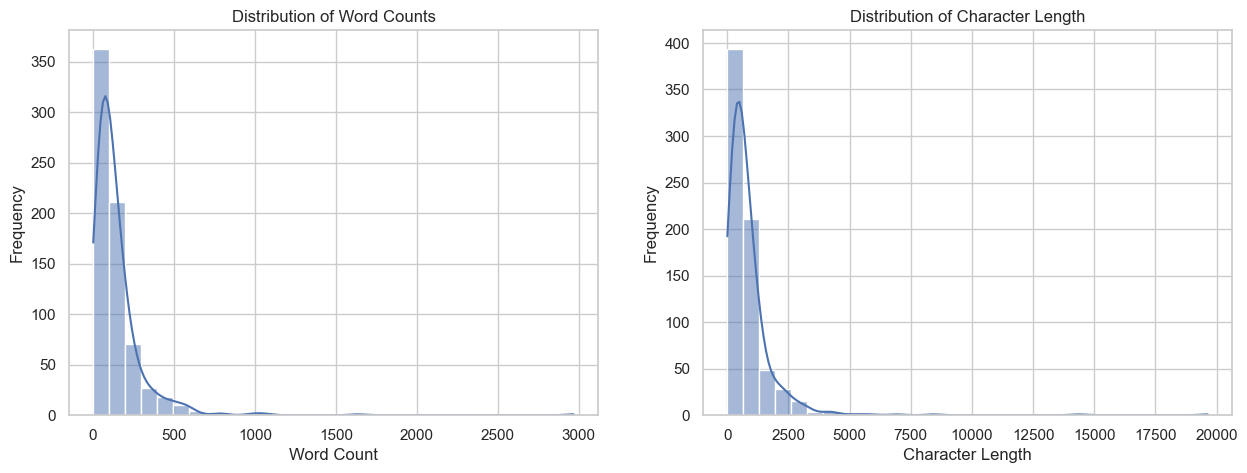

In [126]:
sns.set(style="whitegrid")
#create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#distribution of word counts
sns.histplot(df_datascience['selftext_word_count'], 
             bins=30,kde=True, ax=ax[0])
ax[0].set_title('Distribution of Word Counts')
ax[0].set_xlabel('Word Count')
ax[0].set_ylabel('Frequency')

#distribution of character lengths
sns.histplot(df_datascience['selftext_length'], 
             bins=30,kde=True, ax=ax[1])
ax[1].set_title('Distribution of Character Length')
ax[1].set_xlabel('Character Length')
ax[1].set_ylabel('Frequency')

**Interpretation**

The distribution are right skewed. For word counts it means that the majority of text in the body of topic titles on reddit tend to be shorter with only a small propotion having large number of word. Similiar with character length. Most users tend to write short post.

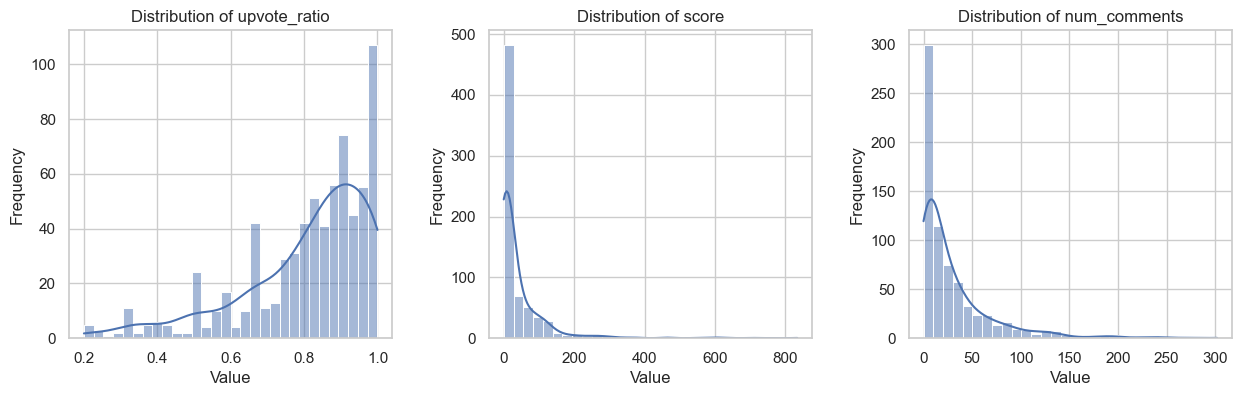

In [131]:
# Columns of interest
selected_columns = ['upvote_ratio', 'score', 'num_comments']

# Set the style
sns.set(style="whitegrid")

# Create subplot
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
plt.subplots_adjust(wspace=0.3)

# Avoid the creation of nested for loops for easier indexing
ax = ax.flatten()

# Plot distribution for each column
for i, column in enumerate(selected_columns):
    sns.histplot(df_datascience[column], bins=30, kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {column}')
    ax[i].set_xlabel('Value')
    ax[i].set_ylabel('Frequency')


**Interpretation**
1. Score: The distribution of scores is right-skewed, suggesting that a significant portion of posts have relatively low scores, but some have higher scores.
2. Upvote Ratio: The distribution is left-skewed, suggesting that most posts receive a high proportion of upvotes.
3. Number of Comments: The distribution of the number of comments is right-skewed, suggesting that most posts have a relatively low number of comments, but some posts have a higher level of engagement.


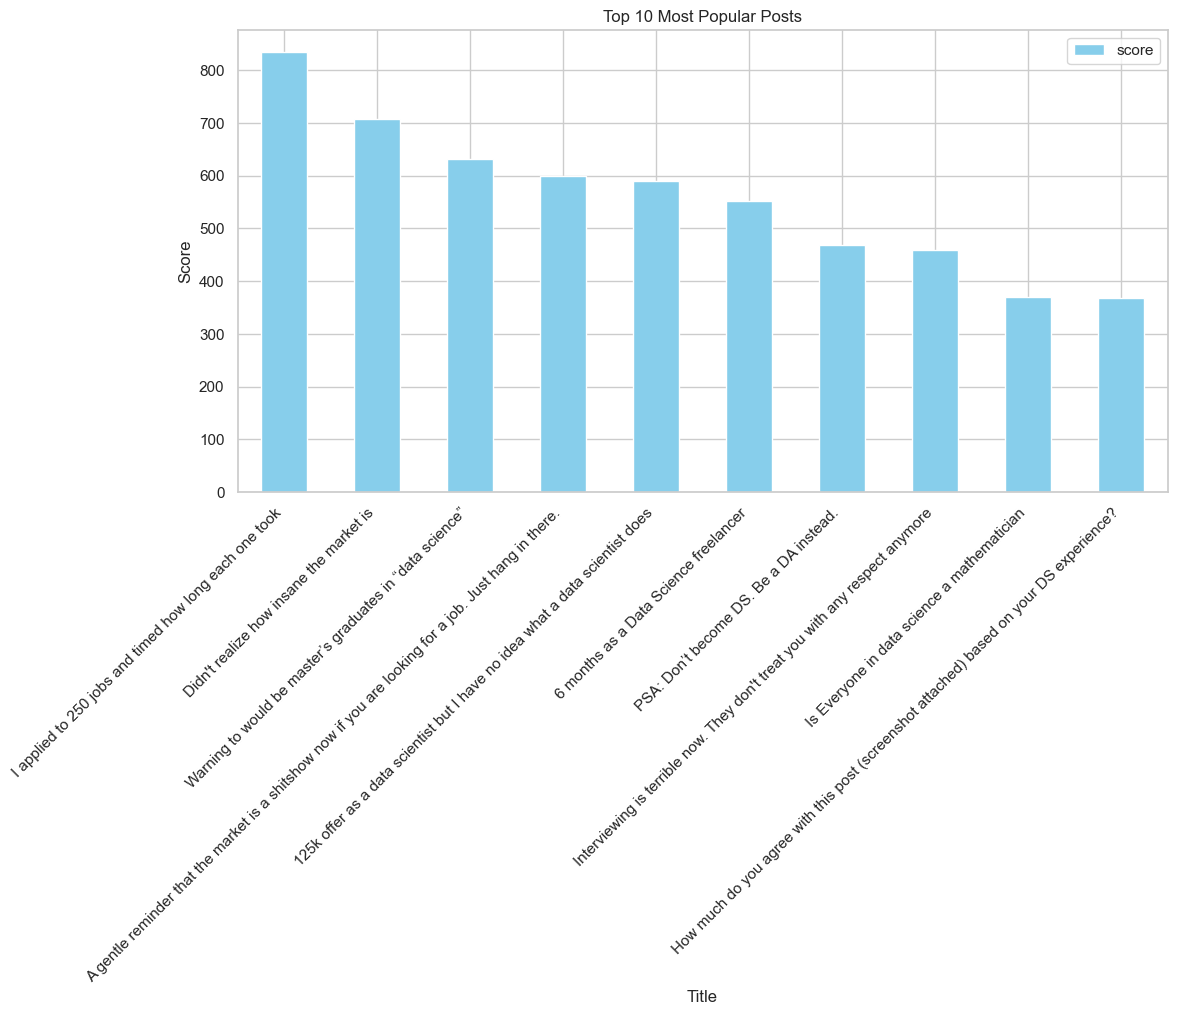

In [136]:
#this code shows visualization of most popular post sorted by score

#sort df by 'score' in desc to get most popular post first
df_sorted_score = df_datascience.sort_values(by='score', ascending=False)

#relavant column for bar chart
popular_posts_score = df_sorted_score.head(10)[['title', 'score']]

#bar chart
fig, ax = plt.subplots(figsize=(12, 6))
popular_posts_score.plot(kind='bar', x='title', y='score', ax=ax, color='skyblue')
ax.set_title('Top 10 Most Popular Posts')
ax.set_xlabel('Title')
ax.set_ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.show()


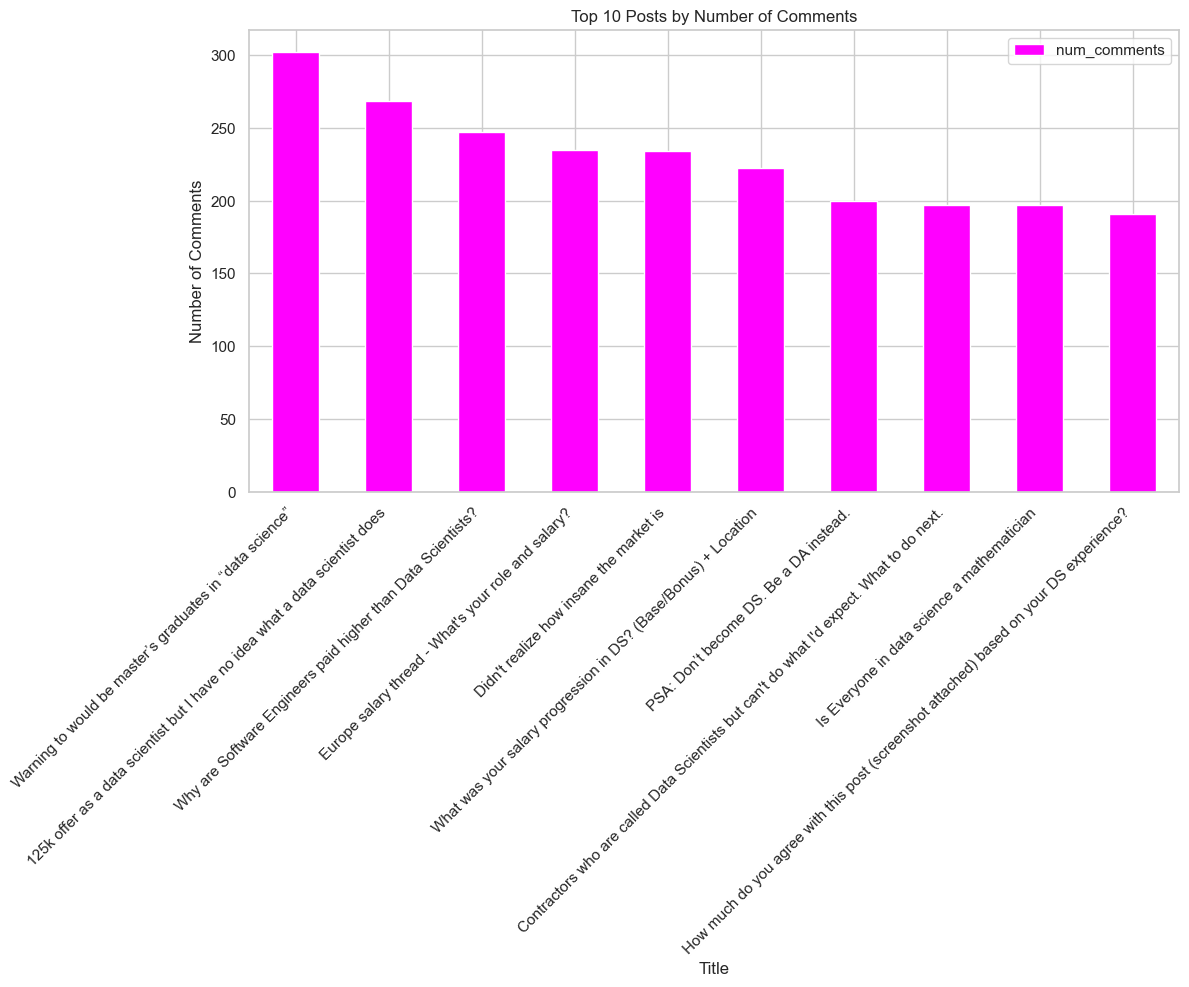

In [138]:
#this code shows visualization of most popular post sorted by comments

# Sort df by num_comments in descending order
df_sorted_num_comments = df_datascience.sort_values(by='num_comments', ascending=False)

#relevant columns for the bar chart
popular_posts_num_comments = df_sorted_num_comments.head(10)[['title', 'num_comments']]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
popular_posts_num_comments.plot(kind='bar', x='title', y='num_comments', ax=ax, color='fuchsia')
ax.set_title('Top 10 Posts by Number of Comments')
ax.set_xlabel('Title')
ax.set_ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')
plt.show()

---

### r/jobs

In [58]:
df_jobs.isnull().sum()

approved_at_utc          3000
subreddit                   0
selftext                    0
author_fullname             3
saved                       0
                         ... 
author_cakeday           2982
is_gallery               2976
gallery_data             2976
crosspost_parent_list    2979
crosspost_parent         2979
Length: 116, dtype: int64

In [89]:
#Drop columns if all the value are missing
df_jobs.dropna(axis=1, how='all', inplace=True)

In [143]:
df_jobs.shape

(3000, 97)

In [142]:
#Check for duplicates in the 'selftext' column
duplicates_mask = df_jobs['selftext'].duplicated()
duplicates_mask

0       False
1       False
2       False
3       False
4       False
        ...  
2995     True
2996     True
2997     True
2998     True
2999     True
Name: selftext, Length: 3000, dtype: bool

In [144]:
# Remove duplicate posts based on selftext column
df_jobs = df_jobs.drop_duplicates(subset='selftext')

In [145]:
df_jobs.shape

(928, 97)

In [148]:
#examine the data distribution
df_jobs.describe()

,gilded,pwls,downs,thumbnail_height,upvote_ratio,ups,total_awards_received,thumbnail_width,score,created,wls,num_comments,subreddit_subscribers,created_utc,num_crossposts
count,928.0,928.0,928.0,39.000000,928.000000,928.000000,928.0,39.0,928.000000,9.280000e+02,928.0,928.000000,928.0,9.280000e+02,928.000000
mean,0.0,6.0,0.0,119.615385,0.862812,75.905172,0.0,140.0,75.905172,1.703421e+09,6.0,16.568966,1443982.0,1.703421e+09,0.022629
std,0.0,0.0,0.0,34.140280,0.197970,881.980466,0.0,0.0,881.980466,2.010896e+05,0.0,103.366555,0.0,2.010896e+05,0.283537
min,0.0,6.0,0.0,13.000000,0.130000,0.000000,0.0,140.0,0.000000,1.703101e+09,6.0,0.000000,1443982.0,1.703101e+09,0.000000
25%,0.0,6.0,0.0,105.000000,0.750000,1.000000,0.0,140.0,1.000000,1.703237e+09,6.0,1.000000,1443982.0,1.703237e+09,0.000000
50%,0.0,6.0,0.0,140.000000,1.000000,2.000000,0.0,140.0,2.000000,1.703379e+09,6.0,2.000000,1443982.0,1.703379e+09,0.000000
75%,0.0,6.0,0.0,140.000000,1.000000,3.000000,0.0,140.0,3.000000,1.703623e+09,6.0,6.000000,1443982.0,1.703623e+09,0.000000
max,0.0,6.0,0.0,140.000000,1.000000,19325.000000,0.0,140.0,19325.000000,1.703733e+09,6.0,2187.000000,1443982.0,1.703733e+09,7.000000


In [149]:
#Create a column selftext_length that contain the
#length of each body of post
df_jobs['selftext_length'] = df_jobs['selftext'].apply(len)
df_jobs.head()

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_20924/3804332420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobs['selftext_length'] = df_jobs['selftext'].apply(len)


,subreddit,selftext,author_fullname,saved,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,...,post_hint,preview,url_overridden_by_dest,media_metadata,author_cakeday,is_gallery,gallery_data,crosspost_parent_list,crosspost_parent,selftext_length
0,jobs,Read that the best way to land a job nowadays is by networking. Well I have terrible social skills and bad anxiety. What can I do to fix this?,t2_3w2gl0jlt,False,0,False,How do people with Anxiety and terrible social skills network?,"[{'e': 'text', 't': 'Networking'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142
1,jobs,"""Mass layoffs are in store for 2024, and it might end up affecting nearly half of companies, according to a new poll.\n\nThat's the latest information from a Resume Builder survey, based on responses from more than 900 companies this month. Resume Builder is a professional platform that allows users to create resumes in just a few steps.\n\nIn the survey, nearly four in 10 companies said they ...",t2_105cy9,False,0,False,Massive layoffs coming in 2024?,"[{'e': 'text', 't': 'Article'}]",r/jobs,False,...,self,"{'images': [{'source': {'url': 'https://external-preview.redd.it/dp9opTKRxA7LyO79uY5x_blBtRMipdgRhqdNDRl95rk.jpg?auto=webp&amp;s=70f9b6556e57e61ef4b017efef6e854f3116d9e4', 'width': 3600, 'height': 2401}, 'resolutions': [{'url': 'https://external-preview.redd.it/dp9opTKRxA7LyO79uY5x_blBtRMipdgRhqdNDRl95rk.jpg?width=108&amp;crop=smart&amp;auto=webp&amp;s=3ac6701d1e6ac6fd1d8505cb5195ec4ba9b71122'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1011
2,jobs,"I enjoy solving problems &amp; dealing with complex situations. I love research, I like data and I have a chemistry background. However, I also love innovation and using creativity. I enjoy aesthetics &amp; expression!!! \n\nI’ve been looking in food product development, formulation chemistry for health, wellness &amp; personal care industry and web &amp; digital interface design. \n\nAre ther...",t2_oqajavlw,False,0,False,What are some scientific jobs that are innovative &amp; creative?,"[{'e': 'text', 't': 'Job searching'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,501
3,jobs,Process at my company is quite easy and my manager is good. She walked my through every question/points and help me think of what to improve next year\n\nThough we both know with a micro-managing boss (her direct manager) those are hard to achieve,t2_pbff0s9v,False,0,False,How's your annual performance review?,"[{'e': 'text', 't': 'Evaluations'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246
4,jobs,"Interviewed with a company and was offered the job and am to be given a start date once the background check is completed.\n\nIn 2022 I had a full time job which moved to part time once I took another position, and I worked at that part time job probably less than 100 hours over all of 2023.\n\nOn my resume I just put the end date for that job as when I stopped being full time and don't bother...",t2_6m4lv,False,0,False,Part time job on resume?,"[{'e': 'text', 't': 'Post-interview'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,870


In [156]:
#column called selftext_word_count that contains 
#the number of words in each body of post:
df_jobs['selftext_word_count'] = df_jobs['selftext'].apply(str.split).apply(len)
df_jobs.head()

,subreddit,selftext,author_fullname,saved,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,...,preview,url_overridden_by_dest,media_metadata,author_cakeday,is_gallery,gallery_data,crosspost_parent_list,crosspost_parent,selftext_length,selftext_word_count
0,jobs,Read that the best way to land a job nowadays is by networking. Well I have terrible social skills and bad anxiety. What can I do to fix this?,t2_3w2gl0jlt,False,0,False,How do people with Anxiety and terrible social skills network?,"[{'e': 'text', 't': 'Networking'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142,29
1,jobs,"""Mass layoffs are in store for 2024, and it might end up affecting nearly half of companies, according to a new poll.\n\nThat's the latest information from a Resume Builder survey, based on responses from more than 900 companies this month. Resume Builder is a professional platform that allows users to create resumes in just a few steps.\n\nIn the survey, nearly four in 10 companies said they ...",t2_105cy9,False,0,False,Massive layoffs coming in 2024?,"[{'e': 'text', 't': 'Article'}]",r/jobs,False,...,"{'images': [{'source': {'url': 'https://external-preview.redd.it/dp9opTKRxA7LyO79uY5x_blBtRMipdgRhqdNDRl95rk.jpg?auto=webp&amp;s=70f9b6556e57e61ef4b017efef6e854f3116d9e4', 'width': 3600, 'height': 2401}, 'resolutions': [{'url': 'https://external-preview.redd.it/dp9opTKRxA7LyO79uY5x_blBtRMipdgRhqdNDRl95rk.jpg?width=108&amp;crop=smart&amp;auto=webp&amp;s=3ac6701d1e6ac6fd1d8505cb5195ec4ba9b71122'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1011,148
2,jobs,"I enjoy solving problems &amp; dealing with complex situations. I love research, I like data and I have a chemistry background. However, I also love innovation and using creativity. I enjoy aesthetics &amp; expression!!! \n\nI’ve been looking in food product development, formulation chemistry for health, wellness &amp; personal care industry and web &amp; digital interface design. \n\nAre ther...",t2_oqajavlw,False,0,False,What are some scientific jobs that are innovative &amp; creative?,"[{'e': 'text', 't': 'Job searching'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,501,79
3,jobs,Process at my company is quite easy and my manager is good. She walked my through every question/points and help me think of what to improve next year\n\nThough we both know with a micro-managing boss (her direct manager) those are hard to achieve,t2_pbff0s9v,False,0,False,How's your annual performance review?,"[{'e': 'text', 't': 'Evaluations'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246,44
4,jobs,"Interviewed with a company and was offered the job and am to be given a start date once the background check is completed.\n\nIn 2022 I had a full time job which moved to part time once I took another position, and I worked at that part time job probably less than 100 hours over all of 2023.\n\nOn my resume I just put the end date for that job as when I stopped being full time and don't bother...",t2_6m4lv,False,0,False,Part time job on resume?,"[{'e': 'text', 't': 'Post-interview'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,870,173


In [157]:
#Remove rows where 'selftext_word_count' is 0
df_jobs = df_jobs[df_jobs['selftext_word_count'] > 0]

---
**Create a dataframe for jobs that shows the five longest and five shortest selftext based off of selftext_word_count:**

In [158]:
# longest selftext
df_long_short2 = df_jobs.sort_values(by='selftext_word_count')
df_long_short2.tail(5)[['selftext', 'selftext_word_count']]

,selftext,selftext_word_count
803,"As part of helping people with their careers, I've been interviewing different people who are in different roles asking them - what do you do?\n\nThis time it's for a Graphic Designer and this will be the last one leading up to the Christmas break. This interview promises insights and advice for aspiring enthusiasts. 21 questions are answered.\n\n**The Value Add:**\n\nThis will hopefully give ...",1019
347,"I’ll do my best to keep this short but earlier this week, my coworker accosted me in our office in front of other coworkers. This past week we were severely understaffed because our supervisor approved way too many people’s time off request for the holiday — and unfortunately, a coworker of ours resigned, so what may have appeared to be enough coverage for those off, ended up not being enough ...",1029
275,"Hi, I don’t know if I am wrong to feel this way about the situation or not. I am a 18F and I work as a barista for a coffee shop. It’s a very nice job and I really like it! But this Christmas Eve my manager told me that I had to work alone because they transferred the coworker I was suppose to work with to another store. I was very upset but I decided to accept anyway because I didn’t want to ...",1097
948,"Hey All!\n\n&amp;#x200B;\n\nLong time lurker, first time posting in this subreddit. I wanted to share my latest experience with my career, anonymously. This is more of me getting this off of my chest and less seeking any advice or answers. It is a bit of a long read and is 100% based on what I went through the later part of this year. Read on at your discretion. \n\n&amp;#x200B;\n\nI will star...",1106
778,"sorry for length, spooling vent below. \n\n\nI was laid off in August and I'm a few weeks into a *terrible* job with a massive paycut for the ""training period"" - I have my ""touchbase"" with HR in January. It's remote. I'm dreading it. I've grown to hate HR people - the middleman that will give me bad news, that's what I'm imagining. No offense to HR people of this sub, but from this, HR general...",1768


In [159]:
#shortest selftext
df_long_short2.head(10)[['selftext', 'selftext_word_count']]

,selftext,selftext_word_count
739,Title,1
909,[https://digitalacademy360.com/digital-marketing-courses-bangalore.php](https://digitalacademy360.com/digital-marketing-courses-bangalore.php)\n\nhttps://preview.redd.it/sf2dwfkgdm7c1.png?width=940&amp;format=png&amp;auto=webp&amp;s=9b5de472e28727779f5543c7e50a65c27bfbfdcc,2
838,Want job,2
98,Location: Upstate Ny,3
516,Let me know,3
327,Was I wrong,3
59,Looking for Job,3
555,It's a sick joke.,4
557,I'll probably gain 10kg,4
341,Anyone else have this experience,5


---

### Visualization r/jobs

**The visual distributions of post lengths. Shows both the distribution of word counts and the distribution of lengths based off character.**

Text(0, 0.5, 'Frequency')

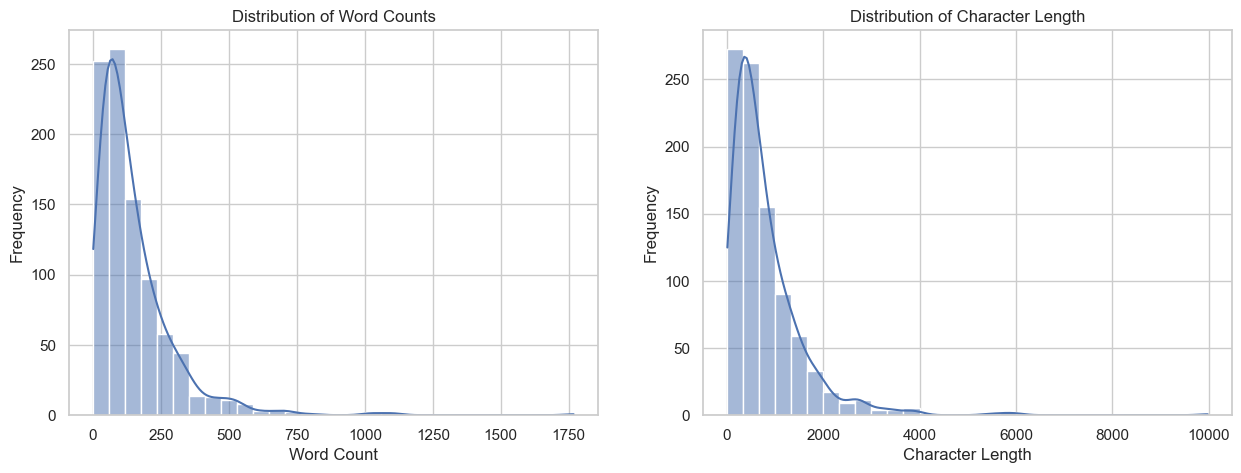

In [160]:
sns.set(style="whitegrid")
#create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#distribution of word counts
sns.histplot(df_jobs['selftext_word_count'], 
             bins=30,kde=True, ax=ax[0])
ax[0].set_title('Distribution of Word Counts')
ax[0].set_xlabel('Word Count')
ax[0].set_ylabel('Frequency')

#distribution of character lengths
sns.histplot(df_jobs['selftext_length'], 
             bins=30,kde=True, ax=ax[1])
ax[1].set_title('Distribution of Character Length')
ax[1].set_xlabel('Character Length')
ax[1].set_ylabel('Frequency')

**Interpretation**

- selftext_word_count: The distribution is right-skewed. Most posts have a relatively low word count,but there are a few posts with a higher word count, contributing to the long tail on the right side of the distribution.
- selftext_length: The distribution is also right-skewed. The majority of posts have a relatively low character length, but there are a few posts with significantly higher character lengths.

In summary, most posts have relatively short selftext content, but there are some posts with longer selftext, creating a right-skewed distribution in both cases.

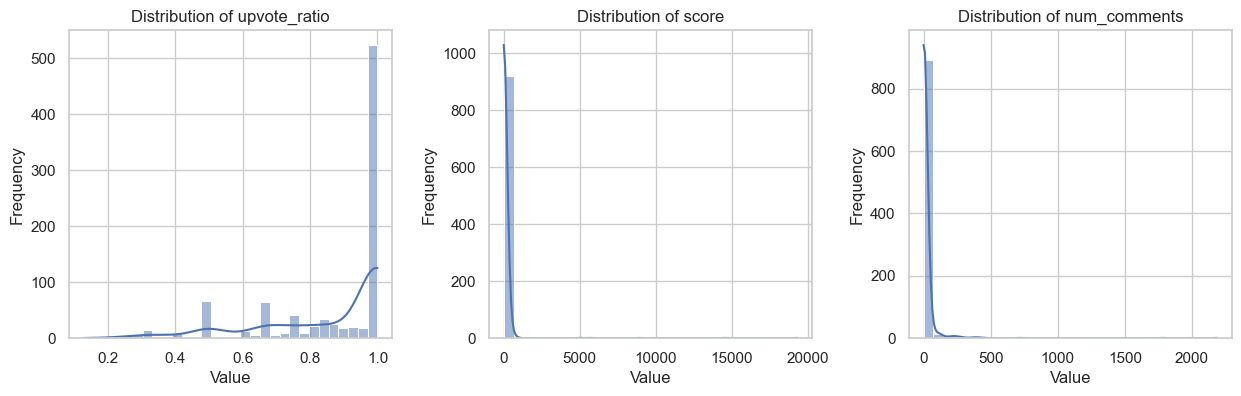

In [161]:
# Columns of interest
selected_columns = ['upvote_ratio', 'score', 'num_comments']

# Set the style
sns.set(style="whitegrid")

# Create subplot
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
plt.subplots_adjust(wspace=0.3)

# Avoid the creation of nested for loops for easier indexing
ax = ax.flatten()

# Plot distribution for each column
for i, column in enumerate(selected_columns):
    sns.histplot(df_jobs[column], bins=30, kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {column}')
    ax[i].set_xlabel('Value')
    ax[i].set_ylabel('Frequency')


**Interpretation**

- Upvote Ratio: The distribution appears to be skewed towards higher values, as indicated by the rightward tail (left-skwedness). There is a moderate spread of upvote ratios, but the bulk of the data is concentrated around the higher end with the the majority of posts having upvote ratios close to 1.0.
- Score: The distribution is highly right-skewed, with a long tail to the right. Most posts have relatively low scores, with a peak in frequency at the lower end of the scale.
- Number of Comments: The distribution is highly right-skewed, where the majority of posts have a low number of comments. 

In summary, most posts tend to have high upvote ratios, while scores and the number of comments are more varied, with a few posts receiving exceptionally high scores and comments

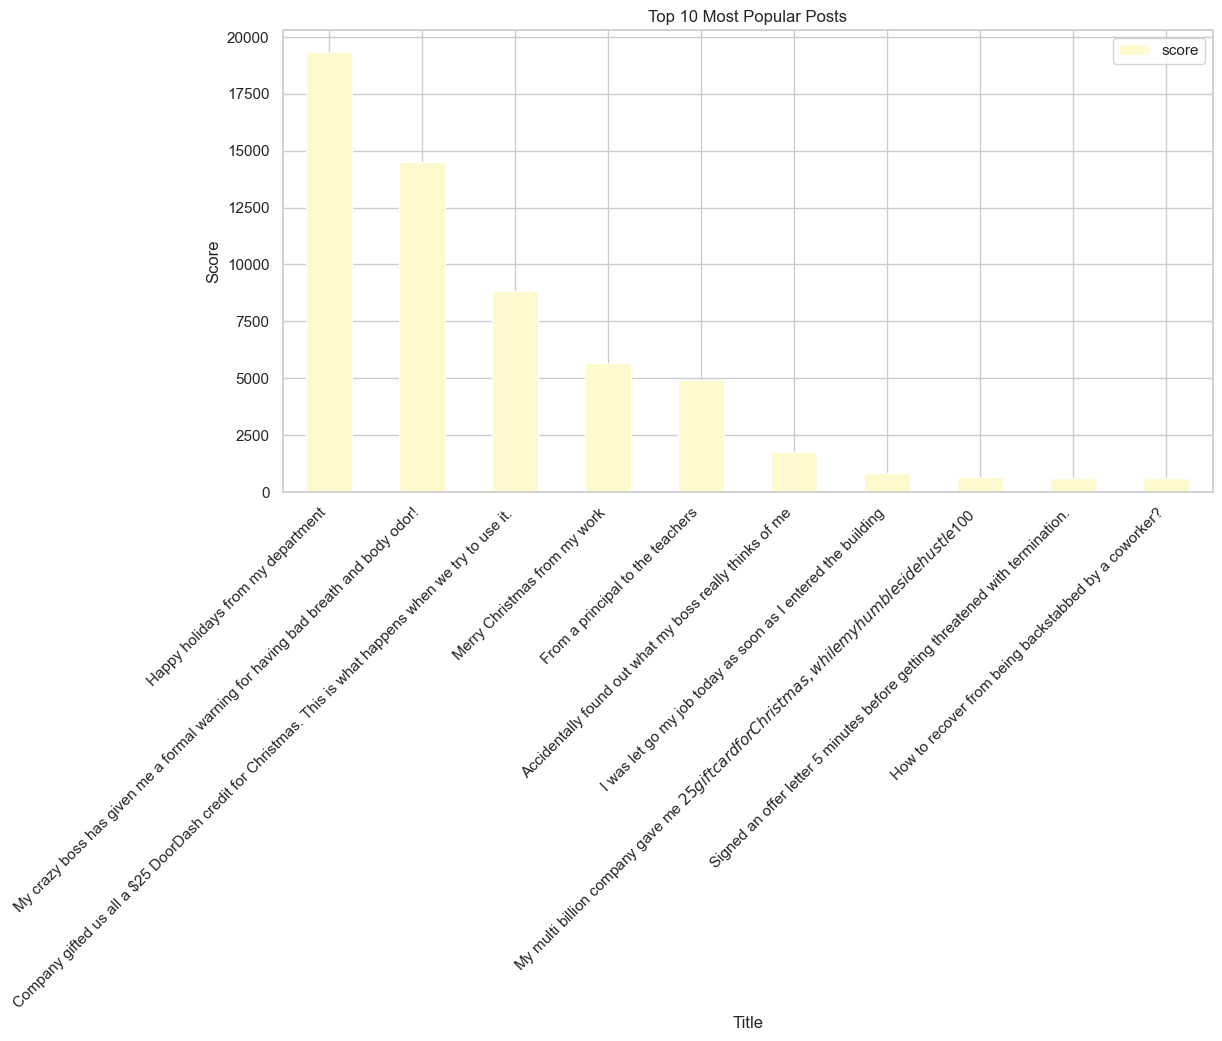

In [164]:
#this code shows visualization of most popular post sorted by score

#sort df by 'score' in desc to get most popular post first
df_sort_score = df_jobs.sort_values(by='score', ascending=False)

#relavant column for bar chart
popular_post_score = df_sort_score.head(10)[['title', 'score']]

#bar chart
fig, ax = plt.subplots(figsize=(12, 6))
popular_post_score.plot(kind='bar', x='title', y='score', ax=ax, color='lemonchiffon')
ax.set_title('Top 10 Most Popular Posts')
ax.set_xlabel('Title')
ax.set_ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.show()

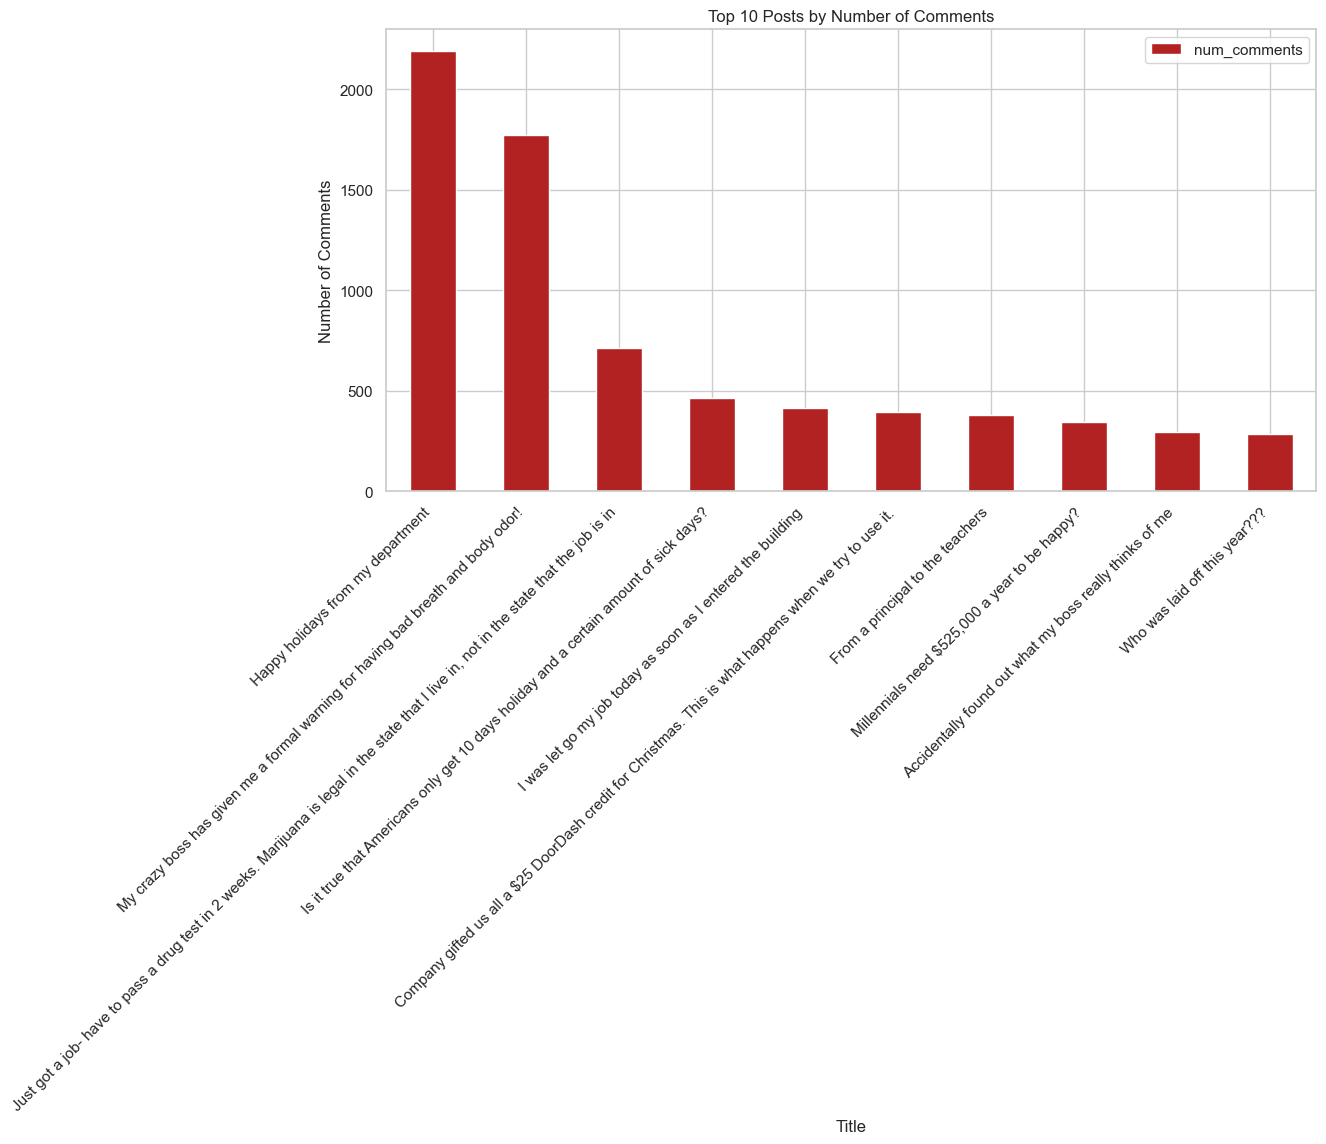

In [165]:
#this code shows visualization of most popular post sorted by comments

# Sort df by num_comments in descending order
df_sort_num_comments = df_jobs.sort_values(by='num_comments', ascending=False)

#relevant columns for the bar chart
popular_post_num_comments = df_sort_num_comments.head(10)[['title', 'num_comments']]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
popular_post_num_comments.plot(kind='bar', x='title', y='num_comments', ax=ax, color='firebrick')
ax.set_title('Top 10 Posts by Number of Comments')
ax.set_xlabel('Title')
ax.set_ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')
plt.show()

**Save the collected data to a CSV file**

In [166]:
df_datascience.to_csv('./data/rdatascience.csv', index=False)

In [167]:
df_jobs.to_csv('./data/rjobs.csv', index=False)